 2.3.3 Complex machine learning models - sklearn - random forest
# Top 3 - MADRID
### The following script contains the following:

#### 1. Import  libraries, additional requirements
#### 2. Import data
#### 3. Create dictionary lists for outcome labels
#### 4. Load and split data into training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        - Madrid
---------------------------------------------------------------------------------------------------------------------------
## 1. Import  libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [4]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. Import data

In [7]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [9]:
mad = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'madrid-subset.csv'))
mad

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.00,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.00,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.00,7.8,12.1,8.2,16.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.52,1.0204,1.89,0.12,5.3,20.0,16.2,23.9
22946,8,0.51,1.0221,1.89,0.12,3.9,19.1,14.7,23.5
22947,8,0.46,1.0186,1.89,0.12,8.1,19.0,15.4,22.6
22948,5,0.66,1.0186,1.89,0.12,3.1,15.7,13.1,18.3


In [11]:
mad_outcomes = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'madrid-outcomes-subset.csv'))
mad_outcomes

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


---------------------------------------------------------------------------------------------------------------------------
## 3. Create dictionary lists for outcome labels

In [14]:
# Print the BELGRADE columns
mad_cols = mad.columns

In [16]:
# Create a dictionary to map binary labels to their corresponding categories
mad_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

--------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data into training/test sets

In [19]:
# Our data doesnt need to be reshaped
X = mad

X.shape

(22950, 9)

In [21]:
y = mad_outcomes

y.shape

(22950, 1)

In [23]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [25]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [29]:
X_train

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
12262,0,0.45,1.0164,2.95,0.00,12.4,31.0,23.7,38.2
9334,3,0.38,1.0204,3.08,0.04,11.6,29.4,22.8,36.0
7100,4,0.57,1.0178,3.22,0.00,11.6,19.0,13.8,24.2
12030,1,0.50,1.0208,1.03,0.00,7.7,7.0,3.5,10.4
2958,6,0.79,1.0107,0.86,0.12,2.7,6.5,3.4,9.6
...,...,...,...,...,...,...,...,...,...
11964,1,0.45,1.0088,2.02,0.00,9.9,20.4,14.8,26.0
21575,3,0.62,1.0210,1.34,0.00,9.7,7.4,2.2,12.6
5390,6,0.53,1.0147,1.78,0.00,7.7,18.1,13.2,23.0
860,0,0.45,1.0204,3.49,0.00,13.6,17.5,10.2,24.8


In [31]:
y_train

,MADRID_pleasant_weather
12262,1
9334,0
7100,1
12030,0
2958,0
...,...
11964,1
21575,0
5390,1
860,1


In [33]:
print(X_test.shape)
X_test

(4590, 9)


,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
19955,2,0.42,1.0114,2.76,0.0,12.8,24.8,18.3,31.2
7729,6,0.78,1.0086,1.28,0.0,5.1,12.3,7.6,17.0
10815,0,0.38,1.0129,2.88,0.0,12.2,27.2,20.9,33.5
3125,5,0.26,1.0158,3.11,0.0,11.9,28.4,23.6,33.2
18985,0,0.58,1.0326,1.12,0.0,9.0,8.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...
15982,2,0.60,1.0166,2.12,0.0,10.3,16.3,11.6,21.0
18660,0,0.58,1.0286,1.45,0.0,9.6,5.2,-0.4,10.7
705,4,0.72,1.0269,1.05,0.0,7.2,8.3,4.6,12.0
12350,6,0.69,1.0180,1.02,0.0,5.6,6.6,1.8,11.4


In [35]:
print(y_test.shape)
y_test

(4590, 1)


,MADRID_pleasant_weather
19955,1
7729,0
10815,1
3125,1
18985,0
...,...
15982,1
18660,0
705,0
12350,0


---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [38]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


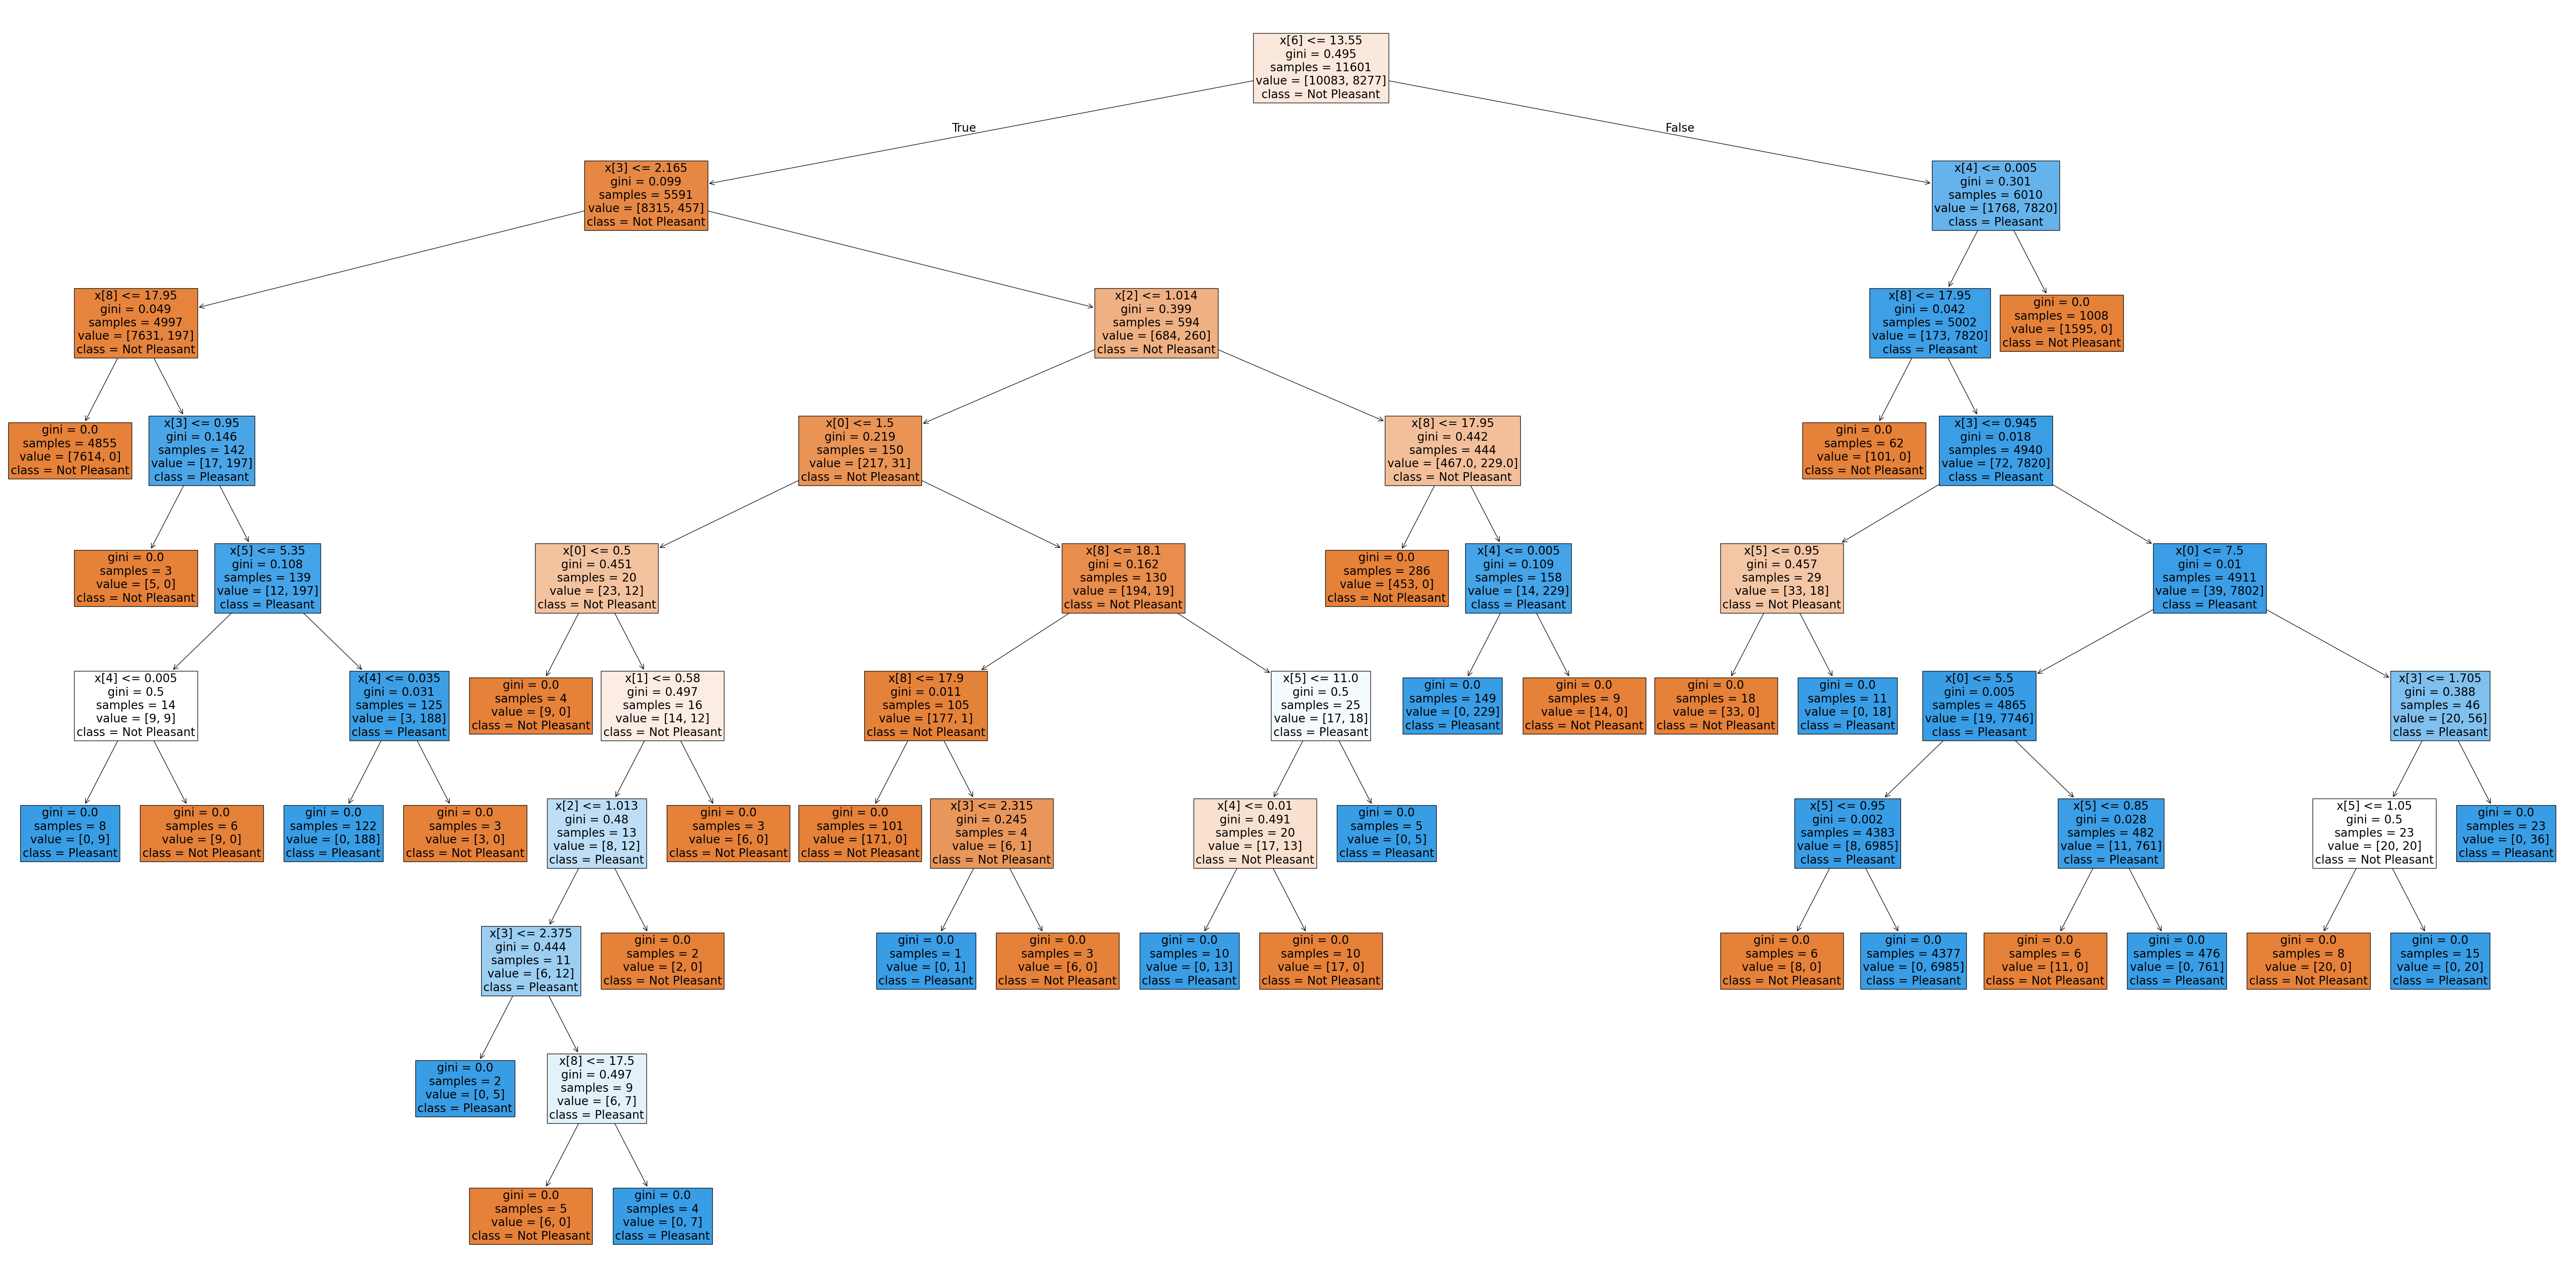

In [42]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=mad_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

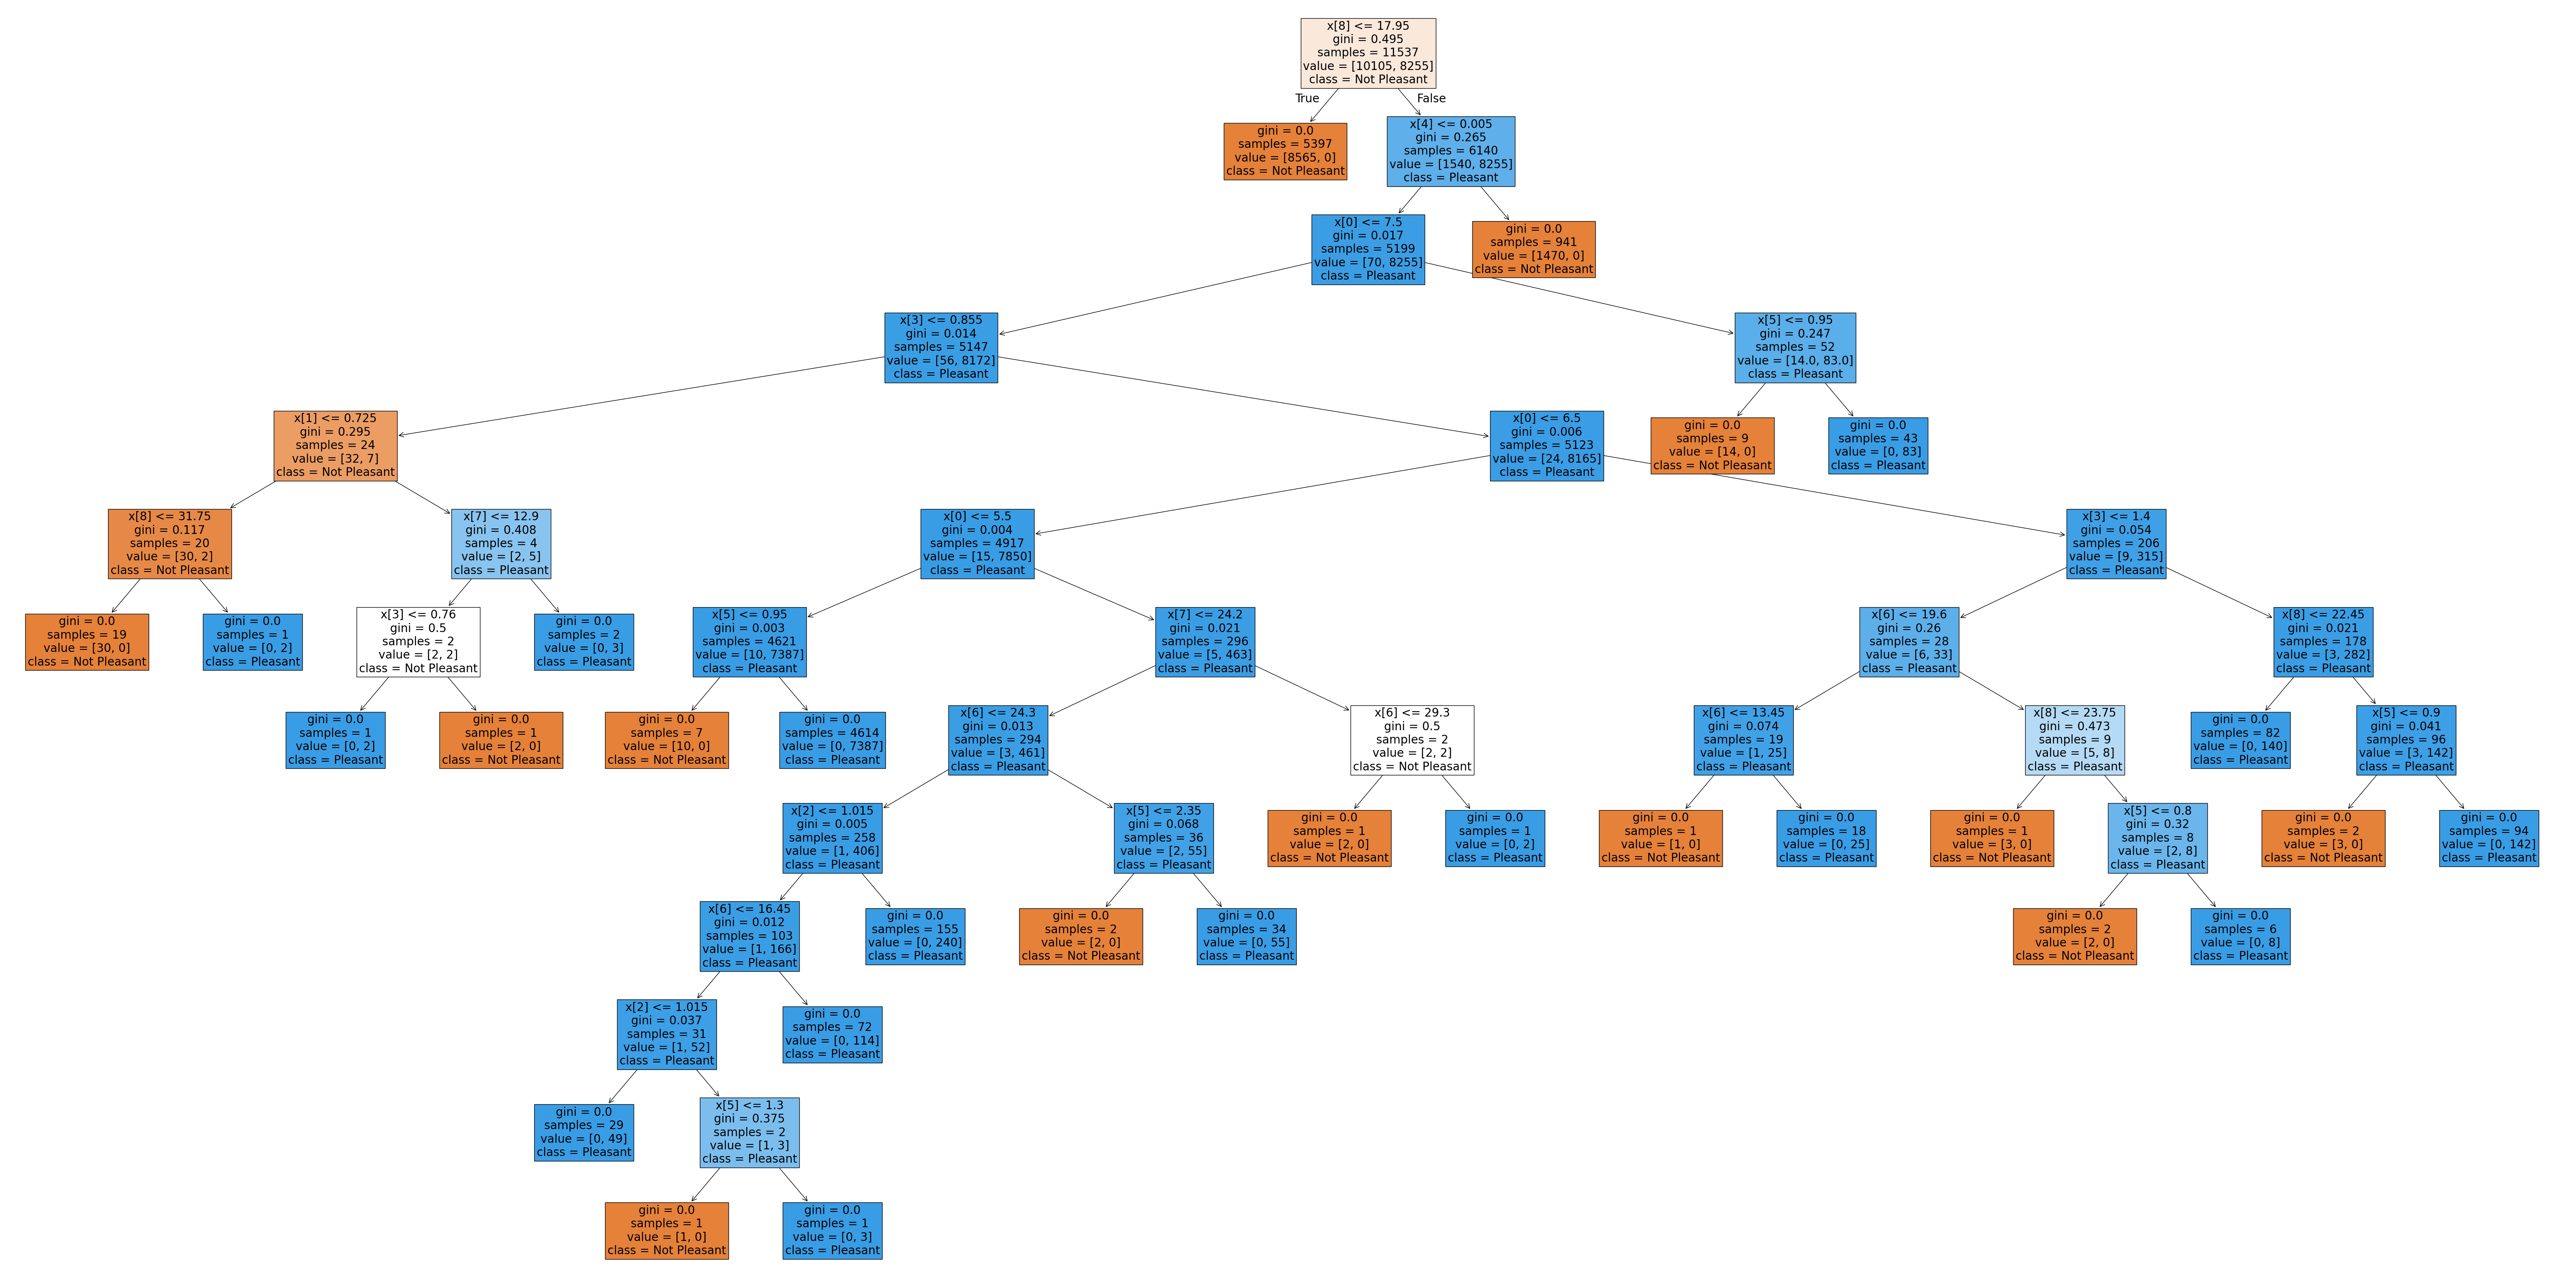

In [44]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=mad_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis
        - Madrid

In [47]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01511046, 0.023875  , 0.00496682, 0.07505585, 0.2197731 ,
       0.08499227, 0.20893538, 0.06535481, 0.30193632])

In [49]:
np.set_printoptions(threshold=1000)

In [51]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.01511046, 0.023875  , 0.00496682, 0.07505585, 0.2197731 ,
         0.08499227, 0.20893538, 0.06535481, 0.30193632]]])

In [53]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.01511046, 0.023875  , 0.00496682, 0.07505585, 0.2197731 ,
       0.08499227, 0.20893538, 0.06535481, 0.30193632])

In [55]:
important = pd.Series(sumarray, index = mad_cols) #.sort_values(ascending = False)
important

MADRID_cloud_cover         0.015110
MADRID_humidity            0.023875
MADRID_pressure            0.004967
MADRID_global_radiation    0.075056
MADRID_precipitation       0.219773
MADRID_sunshine            0.084992
MADRID_temp_mean           0.208935
MADRID_temp_min            0.065355
MADRID_temp_max            0.301936
dtype: float64

Index(['MADRID_cloud_cover', 'MADRID_humidity', 'MADRID_pressure',
       'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine',
       'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max'],
      dtype='object')


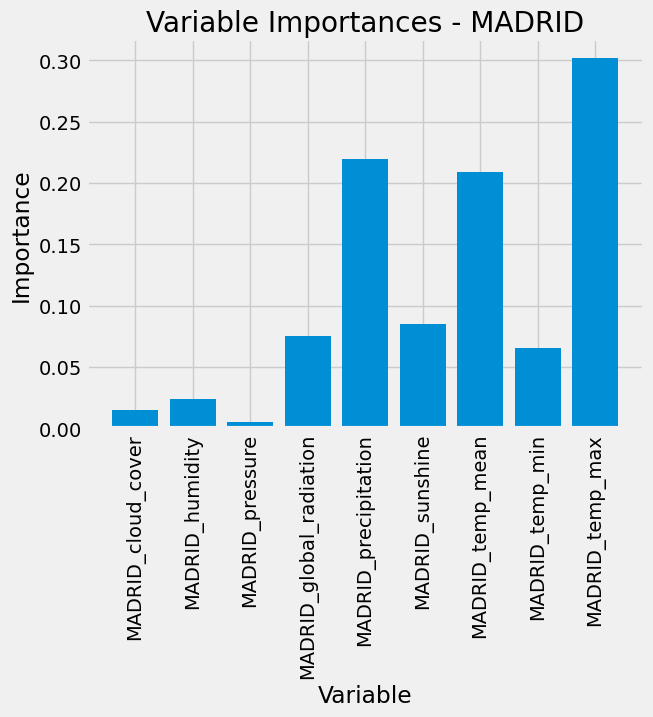

In [57]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(mad_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, mad_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - MADRID');

- **Notes:** Top features of importances are for MADRID weather station are:

        1. Temperature max
        2. Temperature mean
        3. Precipitation
----------------------------------------------------------------------------------------------------------------------